In [1]:
# Import libraries 
import cv2
import mediapipe as mp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [81]:
# Variable initiation 
IMAGE_FILES = ['/Users/lancelotbosseler/code/labosseler/final-project/final-attention/notebooks/trial-images/test.jpg']
mp_face_detection = mp.solutions.face_detection
mp_face_mesh = mp.solutions.face_mesh
mp_drawing = mp.solutions.drawing_utils

In [84]:
#Face detection 
def face_detection():
    with mp_face_detection.FaceDetection(
        model_selection=1, min_detection_confidence=0.5) as face_detection:
        for idx, file in enumerate(IMAGE_FILES):
            image = cv2.imread(file)
# Convert the BGR image to RGB and process it with MediaPipe Face Detection.
            image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            results = face_detection.process(image_rgb)
            #fig, axs = plt.subplots(1, len(results.detections), figsize=(20, 10))
            faces = []
            les_scores = []
            if results.detections: 
                print(f"FACE NUMBER: {face_no+1}")
                print("==============================")
                print(f"FACE CONFIDENCE: {round(face.score[0], 2)}")
                face_data = face.location_data
                print(f"nFACE BOUNDING BOX:n{face_data.relative_bounding_box}")
                for i in range(2):
                    print(f"{face_data.relative_keypoints[mp_face_detection.FaceKeyPoint(i).value]}")
                        
                for i, detection in enumerate(results.detections):
                    bbox = detection.location_data.relative_bounding_box
                    h, w, _ = image_rgb.shape
                    x1 = int(bbox.xmin * w) - int(0.05 * int(bbox.xmin * w))
                    y1 = int(bbox.ymin * h) - int(0.05 * int(bbox.ymin * h))
                    x2 = int((bbox.xmin + bbox.width) * w) + int(0.05 * int(bbox.xmin * w))
                    y2 = int((bbox.ymin + bbox.height) * h) + int(0.05 * int(bbox.ymin * h))
                    cv2.rectangle(image_rgb, (x1, y1), (x2, y2), (0, 255, 0), 2)
                    face = image_rgb[y1:y2, x1:x2]
                    face = cv2.resize(face, (400, 400))
                    faces.append(face)
                    les_scores.append(detection.score)
                    #axs[i].imshow(face)
                    #axs[i].set_title(f"Face {i+1}")
    return faces, les_scores
    

In [85]:
face_detection()

NameError: name 'face_no' is not defined

In [78]:

len(face_detection()[0])

2

In [79]:
# Meshes detection 
def mesh_detection():
    with mp_face_mesh.FaceMesh(
            static_image_mode=True,
            max_num_faces=10,
            min_detection_confidence=0.5,
            refine_landmarks=True,
            min_tracking_confidence=0.5) as face_mesh:
        if len(face_detection()[0]) > 1: 
            fig, axs = plt.subplots(1, len(face_detection()[0]), figsize=(20, 10))
            for idx, i in enumerate(face_detection()[0]):
                results = face_mesh.process(i)
                if results.multi_face_landmarks:
                    face_landmarks = results.multi_face_landmarks[0]
                    annotated_image = i.copy()
                    mp_drawing.draw_landmarks(annotated_image, face_landmarks)
                    axs[idx].imshow(annotated_image)
                    axs[idx].set_title(f"{idx+1}: {face_detection()[1][idx]}")
            #print(str(results.multi_face_landmarks).count('landmark')) #TO DELETE

            return plt.show()
        
        elif len(face_detection()[0]) == 1:
            results = face_mesh.process(face_detection()[0][0])
            if results.multi_face_landmarks:
                    face_landmarks = results.multi_face_landmarks[0]
                    annotated_image = face_detection()[0][0].copy()
                    mp_drawing.draw_landmarks(annotated_image, face_landmarks)
                                              
                    plt.imshow(annotated_image)
                    #plt.set_title(f"face")
            return plt.show()
        
        else: return "No face detected"
    
    

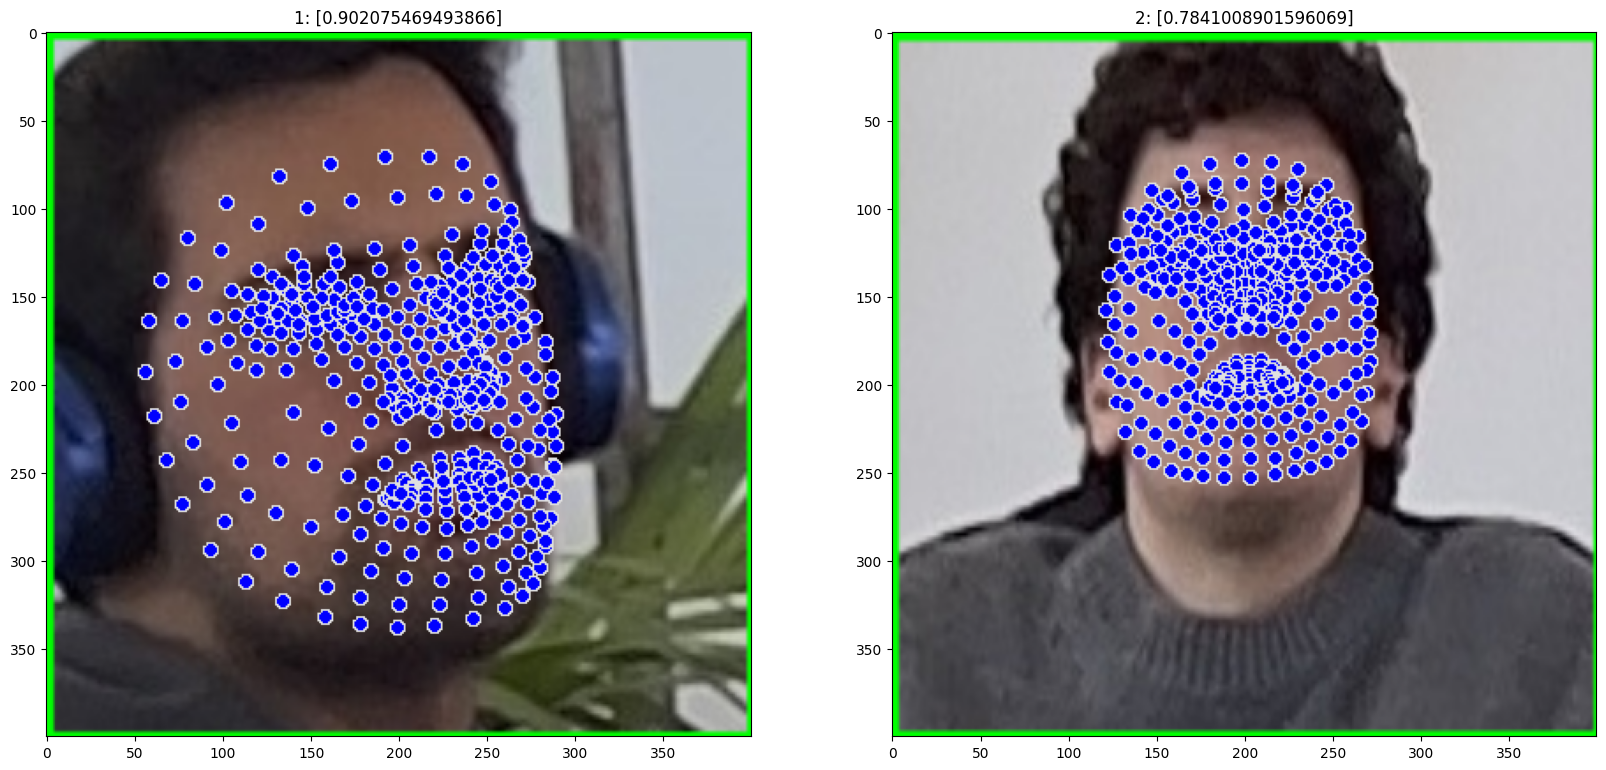

In [80]:
mesh_detection()